#  Semana 6: Teorema do Limite Central

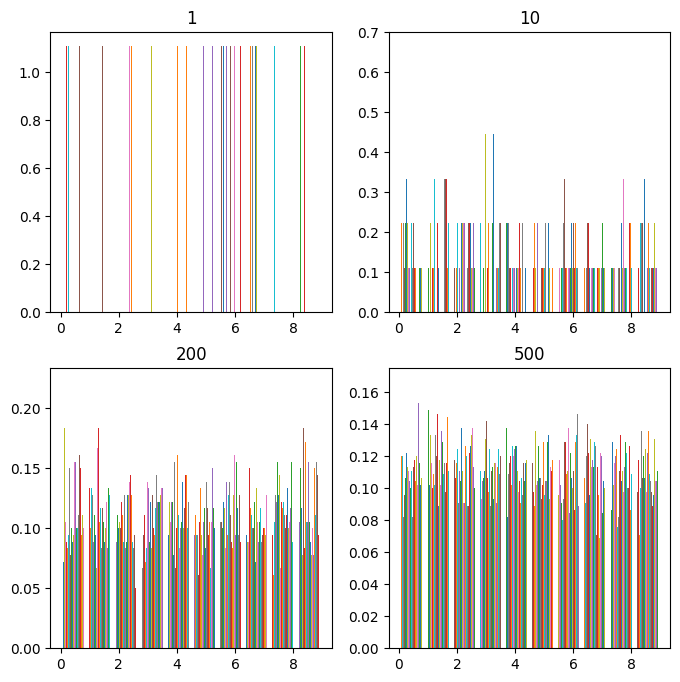

In [1]:
import numpy
import matplotlib.pyplot as plt
#Selecionar vários tamanhos para a amostra
num = [1, 10, 200, 500]
#lista com as médias
means = []
# Vamos gerar 1, 10, 200, 500 números aleatórios entre 0 e 10
# Calculamos a média
# Usamos a função seed de maneira que cada vez que se execute
# temos o mesmo resultado
for j in num:
	numpy.random.seed(20)
	x = [
		numpy.random.randint(
			0, 10, j) for _i in range(1000)]
	means.append(x)
k = 0
# Montar as quatro figuras
fig, ax = plt.subplots(2, 2, figsize =(8, 8))
for i in range(0, 2):
	for j in range(0, 2):
		# Histograma para cada x guardado em means
		ax[i, j].hist(means[k], 10, density = True)
		ax[i, j].set_title(label = num[k])
		k = k + 1
plt.show()

In [ ]:
#Fonte: https://www.geeksforgeeks.org/python-central-limit-theorem/

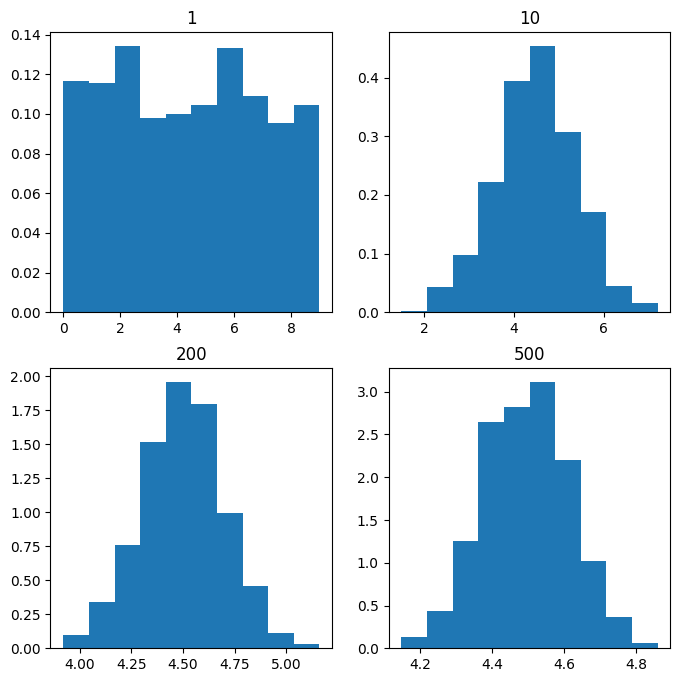

In [2]:
import numpy
import matplotlib.pyplot as plt
#Selecionar vários tamanhos para a amostra
num = [1, 10, 200, 500]
#lista com as médias
means = []
# Vamos gerar 1, 10, 200, 500 números aleatórios entre 0 e 10
# Calculamos a média
# Usamos a função seed de maneira que cada vez que se execute
# temos o mesmo resultado
for j in num:
	numpy.random.seed(20)
	x = [numpy.mean(
		numpy.random.randint(
			0, 10, j)) for _i in range(1000)]
	means.append(x)
k = 0
# Montar as quatro figuras
fig, ax = plt.subplots(2, 2, figsize =(8, 8))
for i in range(0, 2):
	for j in range(0, 2):
		# Histograma para cada x guardado em means
		ax[i, j].hist(means[k], 10, density = True)
		ax[i, j].set_title(label = num[k])
		k = k + 1
plt.show()

## Teorema do Limite Central
​​Para uma amostra aleatória de tamanho 𝒏 de uma população com média 𝝁 e desvio padrão 𝛔, a distribuição da média amostral $\bar{𝒙}$ possui uma média aproximadamente igual a média da população 𝝁 e um desvio padrão igual ao desvio padrão da população dividido pela raiz quadrada do tamanho da amostra, ou seja,

$$\frac{\sigma}{\sqrt{n}}$$

### Interpretação do TLC
Quando amostras de um tamanho específico são escolhidas de uma população, a distribuição das médias dessas amostras tende a seguir uma distribuição normal. Essa aproximação se torna mais precisa à medida que o tamanho das amostras aumenta.



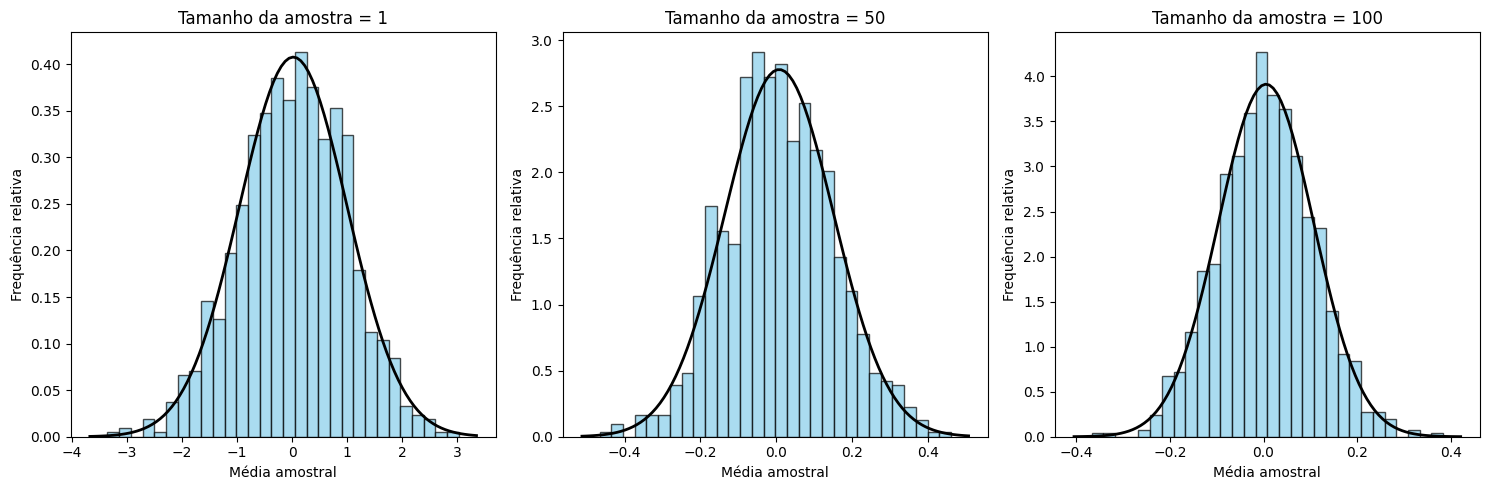

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Definir a população (podemos mudar para a distribuição que quisermos)
populacao = np.random.normal(loc=0, scale=1, size=100000)

# Função para gerar amostrar e calcular a média
def gerar_amostras(tamanho_amostra):
    medias_amostrais = [np.mean(np.random.choice(populacao, size=tamanho_amostra)) for _ in range(1000)]
    return medias_amostrais

# Tamanhos da amostra
tamanhos_amostra = [1, 50, 100]

# criar subgráficos
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Gerar gráficos para diferentes tamanhos da amostra
for i, n in enumerate(tamanhos_amostra):
    medias_amostrais = gerar_amostras(n)
    axs[i].hist(medias_amostrais, bins=30, density=True, alpha=0.7, color='skyblue', edgecolor='black')

    # Adicionar a curva da distribuição gaussiana
    xmin, xmax = axs[i].get_xlim()
    x = np.linspace(xmin, xmax, 100)
    p = norm.pdf(x, np.mean(medias_amostrais), np.std(medias_amostrais))
    axs[i].plot(x, p, 'k', linewidth=2)

    axs[i].set_title(f'Tamanho da amostra = {n}')
    axs[i].set_xlabel('Média amostral')
    axs[i].set_ylabel('Frequência relativa')

plt.tight_layout()
plt.show()


### Exemplo:

Validaremos o teorema do limite central usando um banco de dados real.

Considere o conjunto de dados "Used Cars Dataset" (um conjunto de dados que contém anúncios de carros com vários recursos categóricos e numéricos). Em particular, focaremos na variável aleatória "usd_price". Abaixo estão as etapas a seguir:

**Etapa 1**: vamos inicialmente escolher o tamanho da amostra aleatória da variável "price_usd" como n=5.

**Etapa 2**: realizaremos 1.000 amostras aleatórias com um tamanho de amostra de 5 da coluna "price_usd" e calcularemos a média de cada amostra.

**Etapa 3**: usaremos a biblioteca Matplotlib para gerar um histograma ilustrando a distribuição das 1000 médias amostrais de tamanho 5, definindo o parâmetro bins como 30.

Verificaremos que a distribuição das médias destas amostras tende a seguir uma distribuição normal. Essa aproximação se tornará mais precisa à medida que aumentarmos o tamanho da amostra, então repetiremos o cálculo tomando amostras de tamanho 10 e 30.

In [16]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/Jala University/Tradução Universidade/cars.csv')
df.head()

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
0,7222695916,https://prescott.craigslist.org/cto/d/prescott...,prescott,https://prescott.craigslist.org,6000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,az,NaN,NaN,NaN
1,7218891961,https://fayar.craigslist.org/ctd/d/bentonville...,fayetteville,https://fayar.craigslist.org,11900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaN,NaN,NaN
2,7221797935,https://keys.craigslist.org/cto/d/summerland-k...,florida keys,https://keys.craigslist.org,21000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,fl,NaN,NaN,NaN
3,7222270760,https://worcester.craigslist.org/cto/d/west-br...,worcester / central MA,https://worcester.craigslist.org,1500,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ma,NaN,NaN,NaN
4,7210384030,https://greensboro.craigslist.org/cto/d/trinit...,greensboro,https://greensboro.craigslist.org,4900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,nc,NaN,NaN,NaN


In [3]:
df['price'].max()

3736928711

In [ ]:
#amostras = [coluna_selecionada.sample(tamanho_amostra) for _ in range(1000)]
pd.set_option('display.max_rows', 15)
df['price']

In [4]:
filtro = df['price'] < 100000
dffiltro = df[filtro]
dffiltro['price'].max()

99999

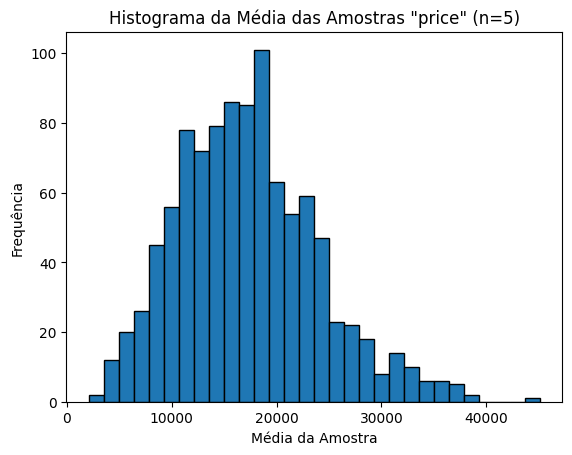

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')
# Carregar a base de dados cars.csv, previamente guardada na pasta de trabalho:
#https://www.kaggle.com/datasets/austinreese/craigslist-carstrucks-data
# Ler o arquivo CSV
df = pd.read_csv('/content/drive/MyDrive/Jala University/Tradução Universidade/cars.csv')
#Temos um valor de 3736928711 que é outlier, criar filtro
filtro = df['price'] < 100000
dffiltro = df[filtro]
# Coluna que queremos ler
nome_coluna = 'price'
# Selecionar a coluna espeficicada
coluna_selecionada = dffiltro[nome_coluna]
# Substitui 'tamanho_amostra' com o tamanho desejado de cada amostra
tamanho_amostra = 5
# Criamos as 1000 amostras aleatórias, cada uma com tamanho "tamanho_amostra",
#da coluna price_usd
amostras = [coluna_selecionada.sample(tamanho_amostra) for _ in range(1000)]
# Calcular a média de cada amostra
medias = [amostra.mean() for amostra in amostras]
# Cria um histograma com média das amostras
plt.hist(medias, bins=30, edgecolor='black')  # Pode ajustar o número de bins com outros valores
plt.title(f'Histograma da Média das Amostras "price" (n={tamanho_amostra})')
plt.xlabel('Média da Amostra' )
plt.ylabel('Frequência')
plt.show()